# CPA 01 
Angelo Cataldo

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# About the data set
- This data set was obtained from https://www.kaggle.com/gregorut/videogamesales
- To download it, go to the above link and click the download button.
- It contains a list of video games with sales greater than 100,000 copies.
- It contains information about the name, publisher, platform, year, and genre of the game.

# Questios about the data
- What gaming platforms are most popular?
- What years were buying games most common?
- What gaming genres are the most popular?
- What publishers are the most popular?

# Reading the data !
This data contains a list of video games that sold over 100 thousand copies

In [3]:
gf = pd.read_csv('vgsales.csv')
gf['Year'] = gf['Year'].fillna(-1).astype(int)
gf.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
gf.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.630980,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.473511,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# The columns and indices

In [15]:
print("Columns:", list(gf.columns))
print("Indices:", gf.index) # would be too long to actually print the list

Columns: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Indices: RangeIndex(start=0, stop=16598, step=1)


# What years does this data set contain?

In [6]:
years = sorted(gf['Year'].unique())
print('This data set takes video games published in the years', years[1], 'to', years[len(years)-1])
print('Although, the data from 2017-2020 is very minimal')

This data set takes video games published in the years 1980 to 2020
Although, the data from 2017-2020 is very minimal


# What platforms have the most total sales

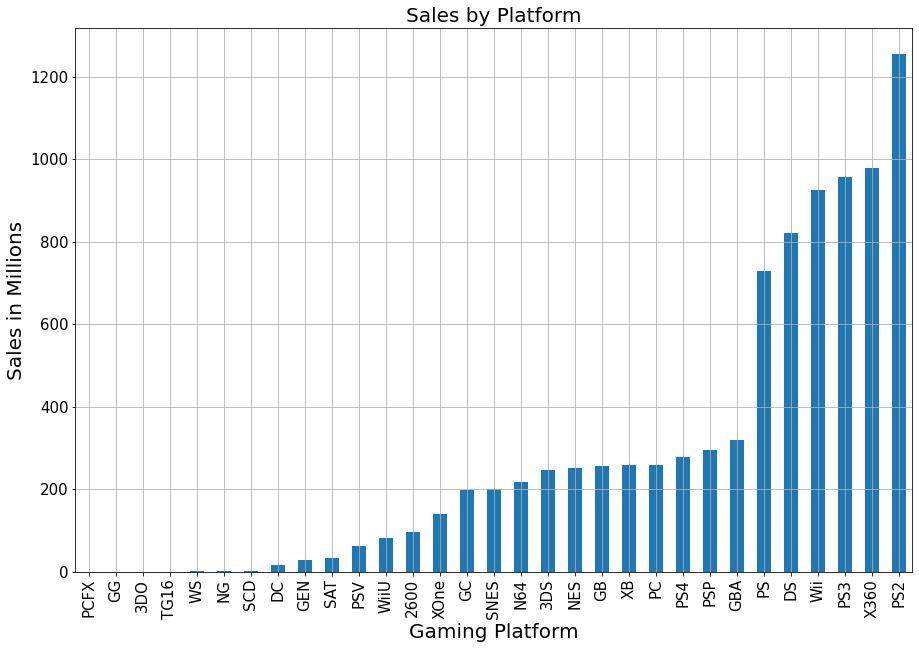

In [19]:
totalSalesByPlatform = gf.groupby('Platform')['Global_Sales'].sum()
totalSalesByPlatform = totalSalesByPlatform.sort_values(ascending=True)
totalSalesByPlatform.plot(kind="bar", figsize=(15,10))
plt.xlabel("Gaming Platform", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Sales in Millions", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Sales by Platform", fontsize=20)
plt.grid()

The golden era of specific console sales seems to be that which consisted of the Playstation, Nintendo DS, Nintendo Wii, Playstation 3, Xbox 360, and Playstation 2. These platforms all released from 1994-2006. Maybe after that era, the freshness and innovation of consoles diminished reducing the market to a more niche one.<br> </br>
Most notably, the Playstation 2 is the clear frontrunner which came out in 2000 and was replaced by the Playstation 3 in 2006.

# What years have the most total sales

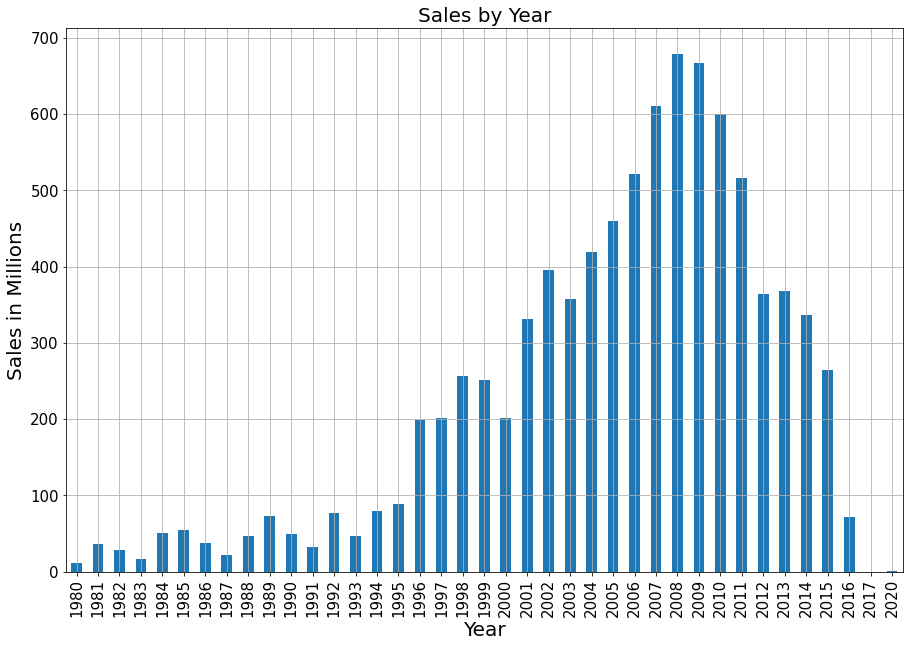

In [20]:
totalSalesByYear = gf.groupby('Year')['Global_Sales'].sum()
totalSalesByYear = totalSalesByYear.drop(-1)
totalSalesByYear.plot(kind="bar", figsize=(15,10))
plt.xlabel("Year",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Sales in Millions", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Sales by Year", fontsize=20)
plt.grid()

This graph shows a more accurate representation of the golden age of gaming by showing the years that video games sold the best. The standout years are those from 2006-2011, which is when big consoles like the Xbox 360, Playstation 3, and Nintendo Wii were already released and selling games to the public.

# Sales by Year and Platform

Text(0.5, 1.0, 'Sales by Year and Platform')

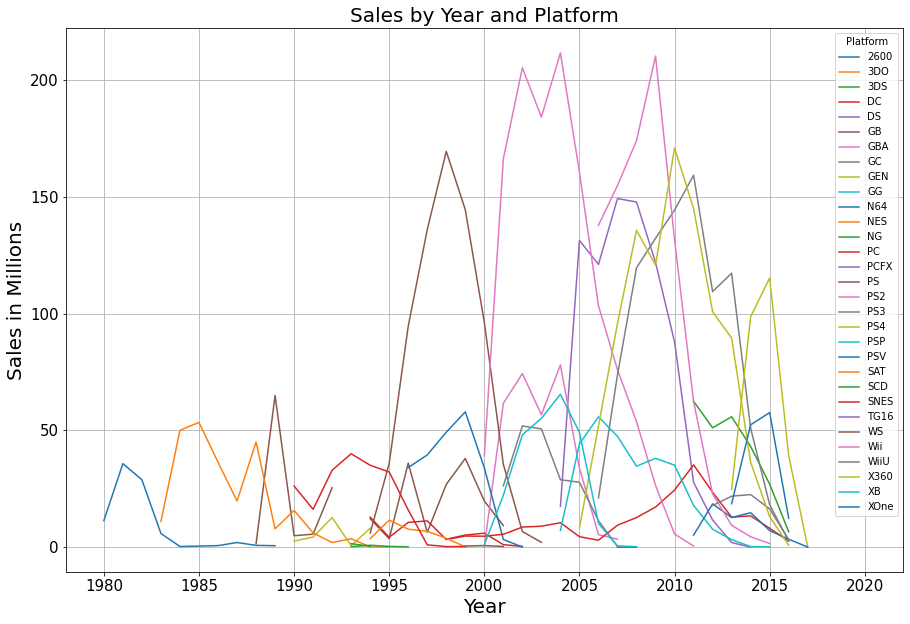

In [24]:
syp = pd.pivot_table(gf, values="Global_Sales", index=["Year"], columns=["Platform"], aggfunc="sum")
syp = syp.drop(-1)
syp.plot(figsize=(15,10))
plt.grid()
plt.xlabel("Year",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Sales in Millions", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Sales by Year and Platform", fontsize=20)

This graph shows that the first big console boom wasn't till around 1997. There was another boom in the early 2000s, but we do not see multiple consoles being very successful untl around 2007 which corroborates what the previous graph shows.

# Sales by Genre

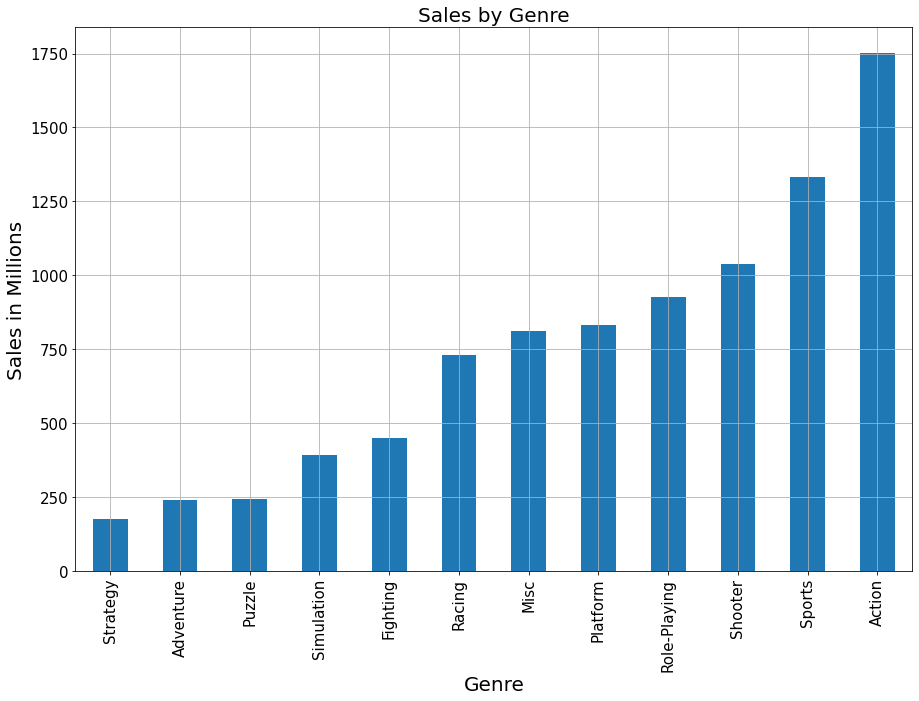

In [22]:
totalSalesByGenre = gf.groupby('Genre')['Global_Sales'].sum()
totalSalesByGenre = totalSalesByGenre.sort_values(ascending=True)
totalSalesByGenre.plot(kind="bar", figsize=(15,10))
plt.xlabel("Genre", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Sales in Millions", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Sales by Genre", fontsize=20)
plt.grid()

The action genre is the most popular game category, followed by the easy to get into sports category. After that is shooters, role-playing games, and others.

# Sales by Publisher

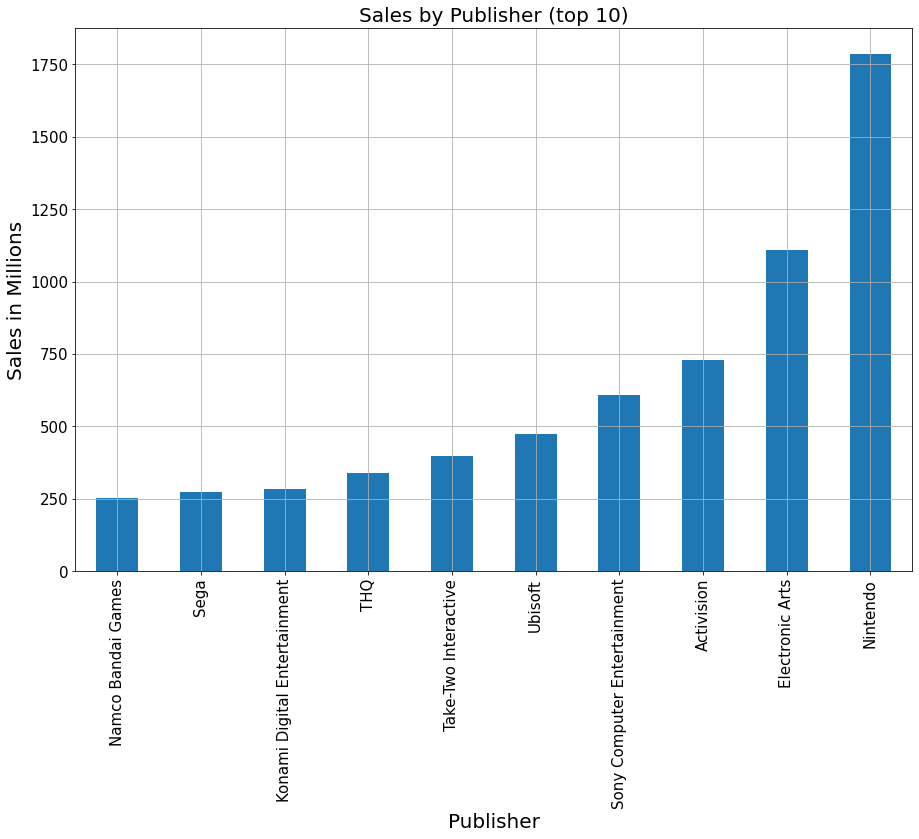

In [28]:
totalSalesByPublisher = gf.groupby('Publisher')['Global_Sales'].sum()
totalSalesByPublisher = totalSalesByPublisher.sort_values(ascending=True)
totalSalesByPublisher = totalSalesByPublisher[-10:]
totalSalesByPublisher.plot(kind="bar", figsize=(15,10))
plt.xlabel("Publisher", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Sales in Millions", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Sales by Publisher (top 10)", fontsize=20)
plt.grid()

Nintendo seems to be the king of gaming publishers, with the #2, Electronic Arts, being only around 60% of the sales size of Nintendo

# Discussion

In conclusion, the Playstaion 2 tops the platform market by a clear margin, followed by a close race involving the Xbox 360, the Playstaton 3, and the Nintendo Wii. In 2006-2011, game sales had a definite peak, but they are still much higher today (as of 2016) then they were in the pre-2000s. Solo consoles had various booms such as in 1997 and 2002, but there wasn't a boom of multiple consoles until 2007. Action and sports top the genre section of video games, which could explain why Electronic Arts are so high. They make popular shooter/action games such Battlefield and Star Wars Battlefront, in addition to popular sports games such as Madden (football) and FIFA (soccer). Additionally, Nintendo tops the market by a longshot, probably due to their family friendly content and easy to like games that can appeal to a plethora of people.